<a href="https://colab.research.google.com/github/Skkodnikk/popakota/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_ipynb%22%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD



In [61]:
df = pd.read_excel('/content/Absenteeism_at_work.xls')


In [62]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,2


In [63]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Hit target                       740 non-null    int64
 10  Disciplinary failure             740 non-null    int64
 11  Education                        740 non-null    int64
 12  Son                              740 non-null    i

In [65]:
df = df.drop (['ID'],axis=1)

In [66]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,2


In [67]:
df.isnull().sum().max()

0

In [68]:
# ПРИ НЕОБХОДИМОСТИ ДОБАВЬТЕ ДЕЙСТВИЯ И ПОДУМАЙТЕ ЧТО ДАЛЬШЕ ПОЙДЕТ В МОДЕЛЬ
X = df.drop('Absenteeism time in hours', axis=1)
Y = df['Absenteeism time in hours']
X.info()
Y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Reason for absence               740 non-null    int64
 1   Month of absence                 740 non-null    int64
 2   Day of the week                  740 non-null    int64
 3   Seasons                          740 non-null    int64
 4   Transportation expense           740 non-null    int64
 5   Distance from Residence to Work  740 non-null    int64
 6   Service time                     740 non-null    int64
 7   Age                              740 non-null    int64
 8   Hit target                       740 non-null    int64
 9   Disciplinary failure             740 non-null    int64
 10  Education                        740 non-null    int64
 11  Son                              740 non-null    int64
 12  Social drinker                   740 non-null    i

In [69]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, n_init='auto')
model.fit(X)
model.labels_



array([0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2,
       2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0,

Можно добавить параметров в предыдущем коде для точности модели

In [70]:
model.cluster_centers_

array([[1.83357314e+01, 6.84652278e+00, 3.96642686e+00, 2.59952038e+00,
        2.69338129e+02, 2.96978417e+01, 1.11846523e+01, 3.58201439e+01,
        9.42757794e+01, 7.67386091e-02, 1.24940048e+00, 1.43884892e+00,
        5.61151079e-01, 5.99520384e-02, 1.26378897e+00, 7.70575540e+01,
        1.70738609e+02, 2.63669065e+01],
       [1.89421488e+01, 6.00000000e+00, 3.56198347e+00, 2.59504132e+00,
        1.26867769e+02, 1.14380165e+01, 1.34628099e+01, 4.01074380e+01,
        9.48429752e+01, 4.95867769e-02, 1.00000000e+00, 8.01652893e-01,
        5.45454545e-01, 1.65289256e-02, 6.61157025e-02, 9.00826446e+01,
        1.79471074e+02, 2.81239669e+01],
       [2.11980198e+01, 5.44059406e+00, 4.01980198e+00, 2.40099010e+00,
        1.78806931e+02, 4.03910891e+01, 1.48366337e+01, 3.55594059e+01,
        9.50792079e+01, 9.90099010e-03, 1.55445545e+00, 2.82178218e-01,
        5.94059406e-01, 1.33663366e-01, 8.41584158e-02, 7.65000000e+01,
        1.70549505e+02, 2.64504950e+01]])

Атрибут model.cluster_centers_ используется в библиотеках машинного обучения, таких как scikit-learn, для хранения координат центров кластеров после выполнения алгоритма кластеризации, например, K-средних.

При применении K-средних данные делятся на K кластеров, и для каждого из них определяется центр, который является средним значением всех точек данных. Эти центры сохраняются в атрибуте model.cluster_centers_, где каждый элемент соответствует координатам центра кластера в пространстве признаков. Для данных с двумя признаками каждый центроид представлен как точка с двумя значениями.

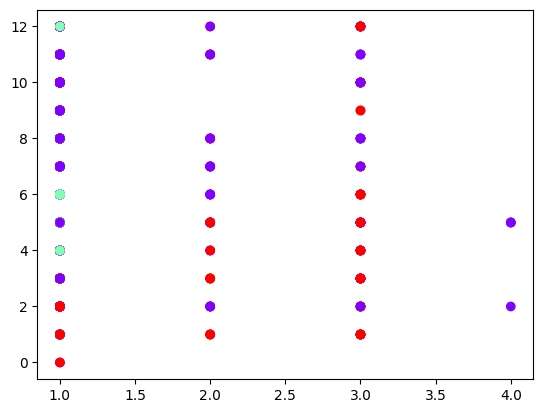

In [71]:
plt.scatter(df.iloc[:,10],df.iloc[:,1], c=model.labels_, cmap='rainbow')

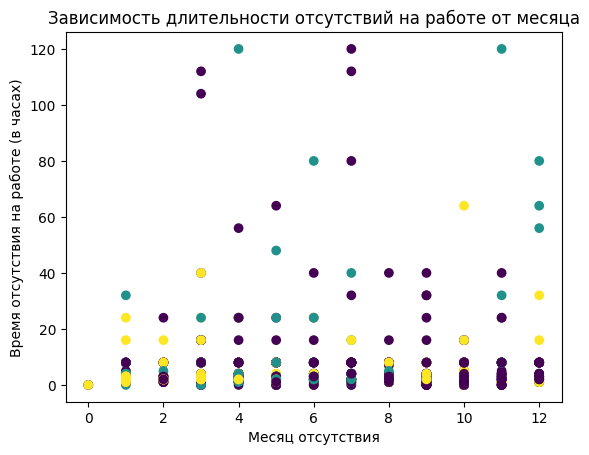

In [72]:
plt.title('Зависимость длительности отсутствий на работе от месяца')
plt.scatter(df.iloc[:,1], df.iloc[:,18],c=model.labels_)#ВЫПОЛНИТЬ ДЛЯ РАЗНЫХ СТОЛБЦОВ (НОМЕРА В []) И ПОЯСНИТЬ
plt.xlabel('Месяц отсутствия')
plt.ylabel('Время отсутствия на работе (в часах)')
plt.show()

График иллюстрирует связь между количеством времени отсутствия на работе (в часах) и месяцем, в котором это происходит. Наблюдается неравномерное распределение времени отсутствия по месяцам.

Возможные причины этой зависимости:

Отпуска: Пики на графике могут быть связаны с периодами отпусков, которые чаще всего приходятся на определенные месяцы (например, летние).

Праздничные дни: Наличие праздничных дней в определенных месяцах может способствовать увеличению как коротких, так и более продолжительных периодов отсутствия на работе (например, перед или сразу после длительных выходных).

Сезонность: В определенные месяцы может увеличиваться количество заболеваний (например, зимние гриппы), что в свою очередь ведет к большему числу и продолжительности больничных. Летом же может наблюдаться рост числа отпусков.

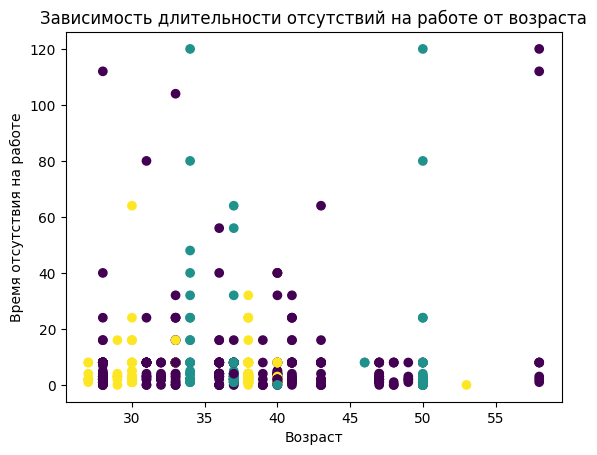

In [73]:
plt.title('Зависимость длительности отсутствий на работе от возраста')
plt.scatter(df.loc [:,'Age'], df.loc [:,'Absenteeism time in hours'], c=model.labels_); #ВЫПОЛНИТЬ ДЛЯ РАЗНЫХ СТОЛБЦОВ И ПОЯСНИТЬ
plt.xlabel('Возраст')
plt.ylabel('Время отсутствия на работе')
plt.show()

График иллюстрирует зависимость между возрастом и временем отсутствия на работе. Можно заметить, что работники возрастом 30-43 имеют тенденцию к увеличению времени отсутствия, хотя корреляция не является строгой. Это может указывать на то, что именно эти сотрудники чаще сталкиваются с обстоятельствами, приводящими к отсутствию на работе. Возможно, это связано с повышенной рабочей нагрузкой, стрессом или возникновением семейных обязательств, таких как забота о детях, что в свою очередь может приводить к увеличению числа больничных или дней, взятых по другим причинам.

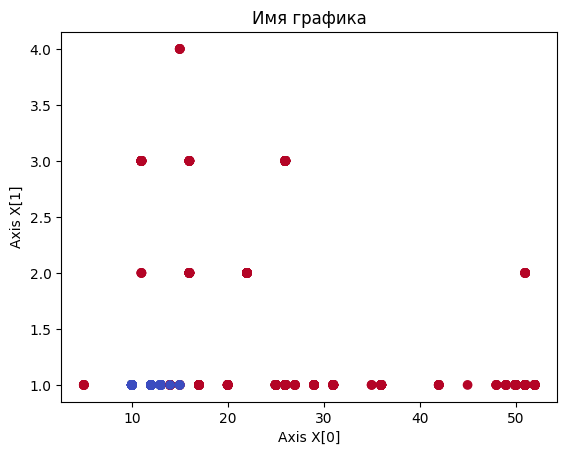

In [74]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', model.labels_))
plt.scatter(X.iloc[:,5], df.iloc[:,10], c=colors, marker="o", picker=True)
plt.title('Имя графика')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [75]:
# T-SNE алгоритм

X_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(df.values)

# PCA алгоритм

X_reduced_pca = PCA(n_components=3, random_state=42).fit_transform(df.values)

#ДЛЯ ВИЗУАЛИЗАЦИИ ПО ДАННЫМ МЕДОТАМ НУЖНЫ МЕТКИ КЛАССОВ И ПОЭТОМУ ВОЗЬМЕМ y

In [76]:
import seaborn as sns
import matplotlib.patches as mpatches

In [77]:
#ДЛЯ ВИЗУАЛИЗАЦИИ ПО ДАННЫМ МЕДОТАМ НУЖНЫ МЕТКИ КЛАССОВ И ПОЭТОМУ ВОЗЬМЕМ y , НАПРИМЕР В ПРЕДЫДУЩЕМ МЕТОДЕ
y=model.labels_
y

array([0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2,
       2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0,

СЛЕДУЮЩИЙ КОД ЗАПУТАН В ВИЗУАЛИЗАЦИИ ДАННЫХ ПОПРОБУЙТЕ РАСПУТАТЬ)

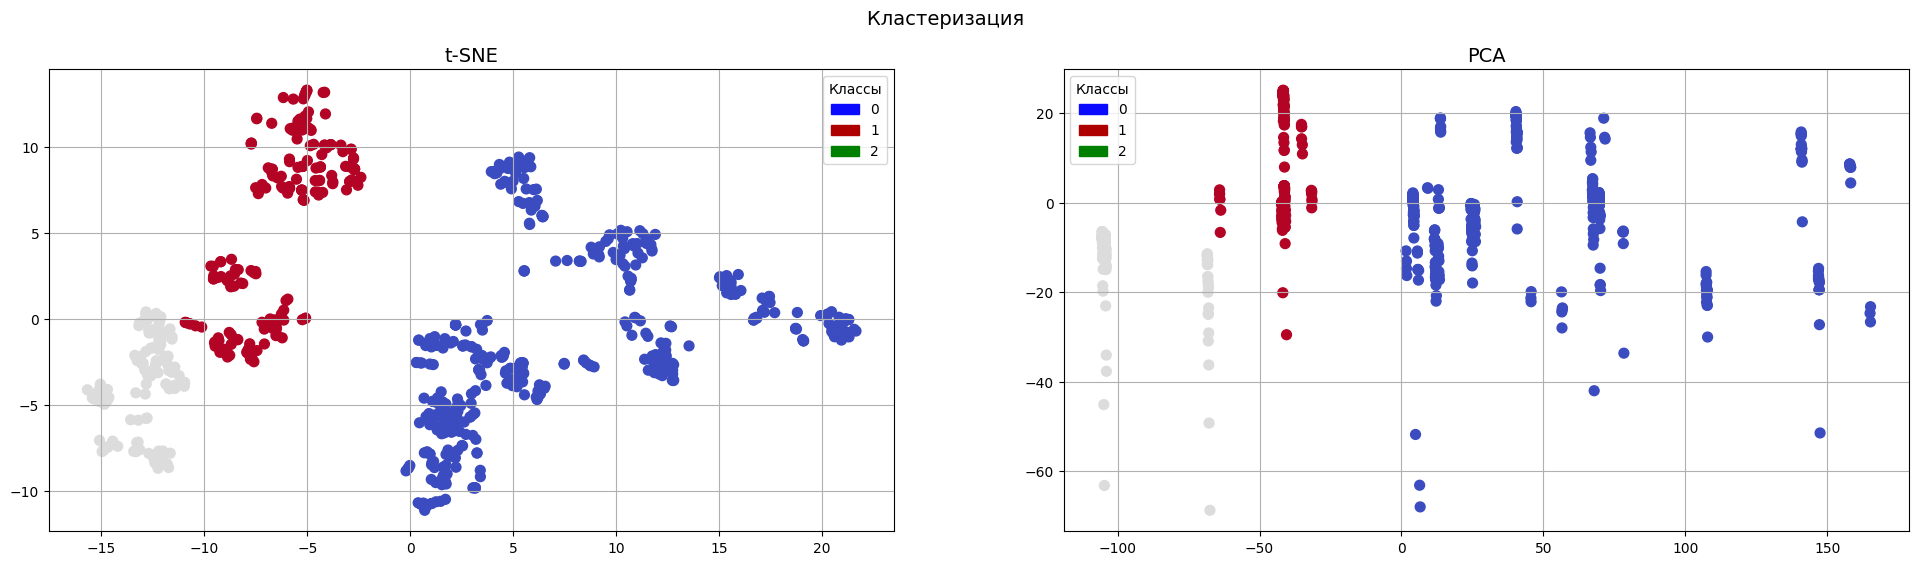

In [78]:
# Код распутан
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Кластеризация ', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
red_patch = mpatches.Patch(color='#AF0000', label='1')
green_patch = mpatches.Patch(color='#008000', label='2')

# t-SNE scatter plot
scatter1 = ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='coolwarm', s=50)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch, green_patch], title='Классы')

# PCA scatter plot
scatter2 = ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='coolwarm', s=50)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch, green_patch], title='Классы')

plt.show()

In [79]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=10, min_samples=8).fit(df)  # пробуйте менять eps и min_samples
labels5 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels5)) - (1 if -1 in labels5 else 0)
n_noise_ = list(labels5).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 15
Estimated number of noise points: 209


In [58]:
db = DBSCAN(eps=5, min_samples=12).fit(df)
labels5 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels5)) - (1 if -1 in labels5 else 0)
n_noise_ = list(labels5).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 595


In [57]:
db = DBSCAN(eps=8, min_samples=10).fit(df)
labels5 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels5)) - (1 if -1 in labels5 else 0)
n_noise_ = list(labels5).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 14
Estimated number of noise points: 314


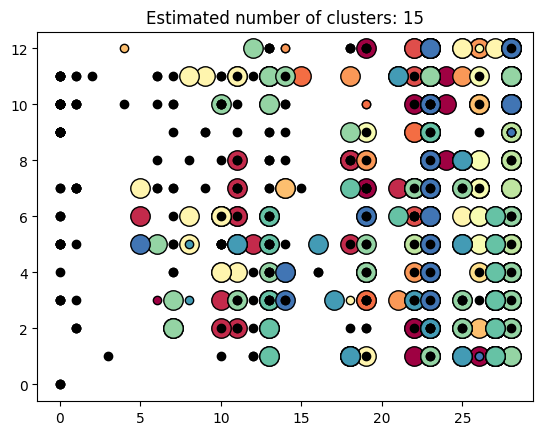

In [80]:
unique_labels = set(labels5)
core_samples_mask = np.zeros_like(labels5, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels5 == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()